## Project Name: The Sweet Truth! 
(Parts 1 + 2 combined)

### In this file, I will illustrate how our 'Sweet Truth' detector can be used to predict sweeteners (whether naturally occuring or synthetic) present in an image of ingredient list. 

* The `module_detector` file will be imported for obtaining all the necessary functions required for this task.
* Along with this, we will also load our `sweet_truth_detector.pkl` model which actually predicts the sweeteners from the ingredients.
* Our detector can present the output in 2 different ways and both of them will be presented:
    * Either as a dataframe with the sweeteners predicted along with the model's confidence in this prediction.
    * An annotated image along with the dataframe described above.

The testing will be performed in two stages. 
#### A. The detection from ingredient lists as *text*. 

This will confirm our main model's is working which essentially detects the sweeteners. I will first check the detection from sample ingredient lists: 
1. a randomly selected entry from our originally curated synthetic dataset - `ingredients_sweeteners_list.csv`.
2. Actual ingredient list from open food facts:
    * Corn flakes - from [open food facts](https://in.openfoodfacts.org/product/8901499010216/corn-flakes-kellogg-s)
    * Dal makhani mix - [open food facts](https://in.openfoodfacts.org/product/8901047816208/dal-makhani-kohinoor)

#### B. Detection from the *images* of various ingredient lists. 

The real-world ingredient lists used for our testing are as follows: 
(The images are either self-clicked or taken from open food facts.) 
1. Corn flakes - from [open food facts](https://in.openfoodfacts.org/product/8901499010216/corn-flakes-kellogg-s)
2. Toothpaste
3. Biscuits - from [open food facts](https://in.openfoodfacts.org/cgi/product_image.pl?code=8901719125478&id=ingredients_en)
4. 'Sugar free' dark chocolate - [open food facts](https://world.openfoodfacts.org/product/8901262071048/amul-sugar-free-chocolate)
5. Moong dal - [open food facts](https://in.openfoodfacts.org/product/8904004403718/moong-dal-haldiram-s)
6. Children's nutrition drink
7. Herb mix

#### Let's go!!

In [1]:
# necessary imports 

import joblib 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# loading our detector 
model = joblib.load('sweet_truth_detector.pkl')

In [3]:
from module_detector import *

### A. Detection from textual ingredient lists. 
#### 1. Picking a random list from our synthetic dataset. 

* FUNCTION USED: `sweet_truth_from_list(list, model)`
* OUTPUT: A dataframe presenting the sweeteners and the model's confidence in the prediction.

In [4]:
# sample list of ingredients that i will work with from our synthetically curated dataset. 

df = pd.read_csv('ingredients_sweeteners_list.csv')
df.head()

Ingredient List  Sweeteners?
0  EMULSIFIERS [481(i), 471 & 472e], RAISING AGEN...          nil
1  Thiamine hydrochloride, calcium lactate, calci...          nil
2  Edible Vegetable Oil (Soyabean, Palmolein), ir...          nil
3  PRESERVATIVE (211), Milk solids, BHA, Maple su...  Maple sugar
4  disodium guanylate or inosinate, Refined Soyab...      Xylitol

In [11]:
# a list randomly picked from our synthetic dataset 
import random 

idx = random.randint(0, len(df)-1)
print("index=", idx)
input_text = df['Ingredient List'].iloc[idx]
print("The ingredient list:", input_text)

# detecting the sweetener from the list, if any
sweet_truth_from_list(input_text, model)

index= 36
The ingredient list: Maltitol, Leavening agent , Acidity Regulator (260), EMULSIFIERS (E322, E476)., Emulsifiers [471,481 (i)], citric acid


Ingredient  Confidence
1   maltitol   90.687361

Great! The function defined in our custom module is now working!! It can detect sweeteners from an input list from any randomly picked entry from our synthetically curated dataset. 

#### 2. Now, let us also check how this function performs on real-world data. 

I am selecting 2 food products where one has a sweetener and the other doesn't. These are randomly picked from Open Food Facts website. 

I have picked these two lists: 
1. **Has sweetener-** [Corn Flakes](https://in.openfoodfacts.org/product/8901499010216/corn-flakes-kellogg-s): "Corn Grits (87.7%), Sugar, Cereal Extract, Iodized Salt, Vitamins, Minerals and Antioxidant (INS 320)."
2. **No sweetener-** [Dal Makhani mix](https://in.openfoodfacts.org/product/8901047816208/dal-makhani-kohinoor): "Water, Black Gram Lentils (33.3%), Tomato (8.4%), Red Kidney Beans (4%), Sunflower Oil, Garlic, Salt, Ginger (0.6%), Cumin Powder, Garam Masala, Red Chilli powder, Fenugreek Leaves, Cinnamon, Cardamom, Bay leaf, Nutmeg Powder, Mace Powder" 

In [12]:
# checking our detector on corn flakes
in1 = "Corn Grits (87.7%), Sugar, Cereal Extract, Iodized Salt, Vitamins, Minerals and Antioxidant (INS 320)." 
sweet_truth_from_list(in1, model)

Ingredient  Confidence
1      sugar   94.900222

In [13]:
# testing our detector on the dal makhani mix 
in2 = "Water, Black Gram Lentils (33.3%), Tomato (8.4%), Red Kidney Beans (4%), Sunflower Oil, Garlic, Salt, Ginger (0.6%), Cumin Powder, Garam Masala, Red Chilli powder, Fenugreek Leaves, Cinnamon, Cardamom, Bay leaf, Nutmeg Powder, Mace Powder" 
sweet_truth_from_list(in2, model)

'No sweeteners detected.'

#### Great!! I am quite happy with the performance of my model and with the fact that it is working on real-world ingredients as well.

### B. Let us now see our image-to-sweetener detector in action! 

Here, two functions will be ued to present the results. 

* FUNCTION USED: `sweet_truth_from_image(image_path, model)` ; OUTPUT: Dataframe with the detected sweeteners

* FUNCTION USED: `annotate_image_with_sweeteners(image_path, model)` ; OUTPUT: Annotated image and the dataframe with the detected sweeteners

#### Let's begin!! 

1. Corn flakes - from [open food facts](https://in.openfoodfacts.org/product/8901499010216/corn-flakes-kellogg-s)

In [5]:
data_dir = '/Users/bhawakshipunia/data_science_projects/hidden_sugar_detection/'
path_1 = data_dir + 'corn_flakes.jpg'

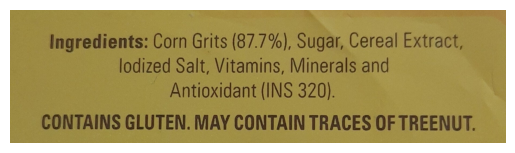

Ingredient  Confidence
1      sugar   94.900222

In [6]:
sweet_truth_from_image(path_1, model)

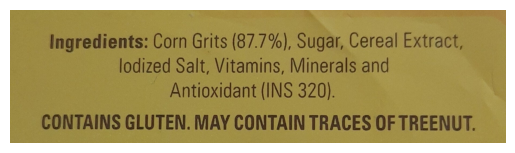

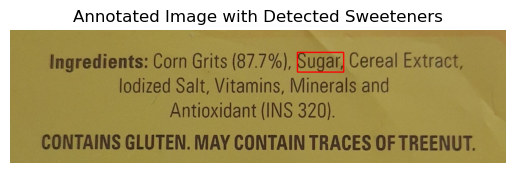

Ingredient  Confidence
1      sugar   94.900222

In [8]:
# getting the annotated image 
annotate_image_with_sweeteners(path_1, model)

Great!! Our full-fledged sweetener detection pipeline is now working!! 

Let us check this function on all other image samples that I have collected. 

2. Toothpaste

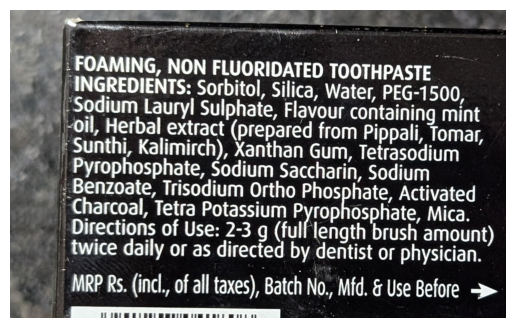

Ingredient  Confidence
1          sorbitol   90.909091
2  sodium saccharin   86.249524

In [9]:
path_2 = data_dir + 'toothpaste.jpg'

sweet_truth_from_image(path_2, model)

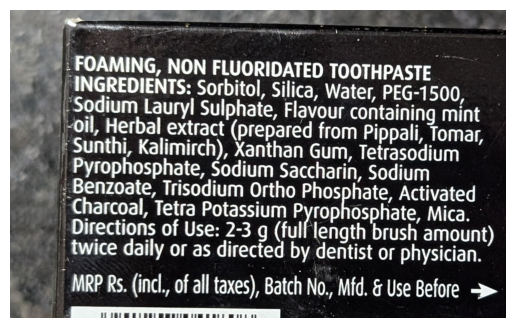

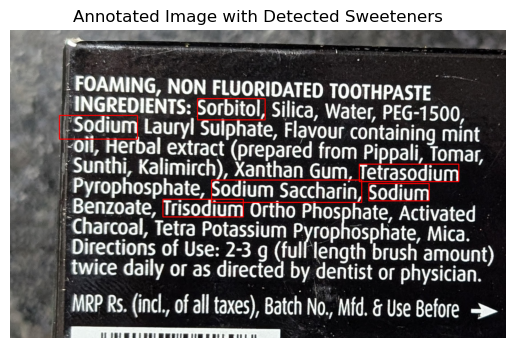

Ingredient  Confidence
1          sorbitol   90.909091
2  sodium saccharin   86.249524

In [10]:
annotate_image_with_sweeteners(path_2, model)

3. Biscuits - from [open food facts](https://in.openfoodfacts.org/cgi/product_image.pl?code=8901719125478&id=ingredients_en)

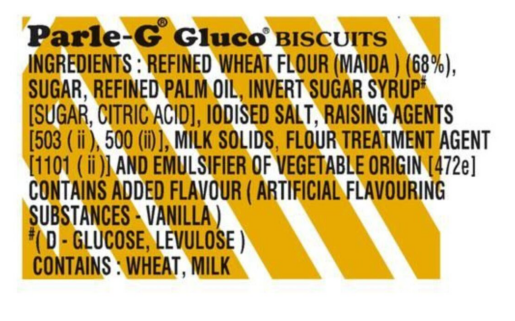

Ingredient  Confidence
1                         sugar   94.900222
2  invert sugar syrup ? ( sugar  100.000000

In [11]:
path_3 = data_dir + 'biscuits.jpg'

sweet_truth_from_image(path_3, model)

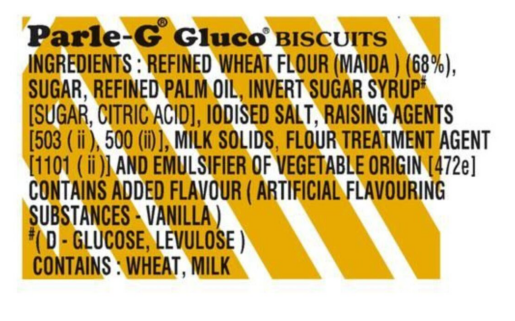

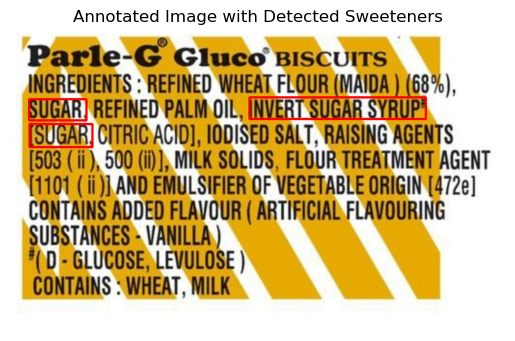

Ingredient  Confidence
1                         sugar   94.900222
2  invert sugar syrup ? ( sugar  100.000000

In [12]:
annotate_image_with_sweeteners(path_3, model)

4. 'Sugar free' dark chocolate - [open food facts](https://world.openfoodfacts.org/product/8901262071048/amul-sugar-free-chocolate)

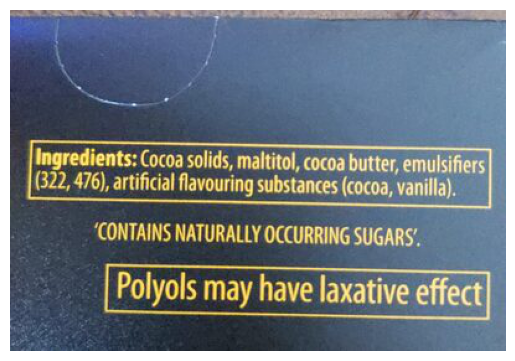

The image is not clear enough for appropriate text extraction.


In [13]:
path_4 = data_dir + 'sugar_free_chocolate.jpg' 
sweet_truth_from_image(path_4, model)

So, this is an example where this model may fail because the image is not clear. 

To address this, I enhanced the image and then provided it to the detector again. 

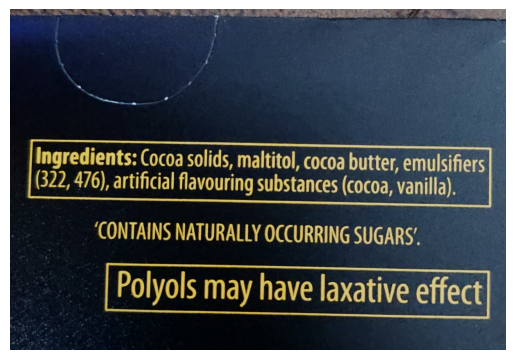

Ingredient  Confidence
1                         maltitol   90.687361
2  contain naturally occur sugar '   94.900222

In [14]:
path_4 = data_dir + 'enhanced_sugarfreechocolate.jpg' 
sweet_truth_from_image(path_4, model)

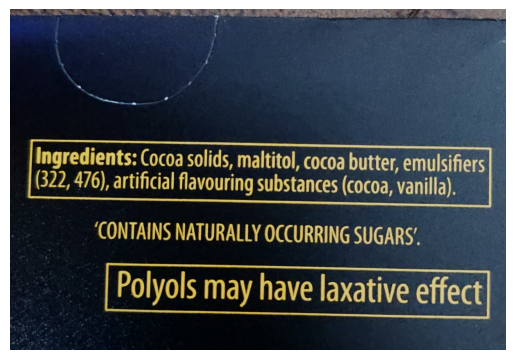

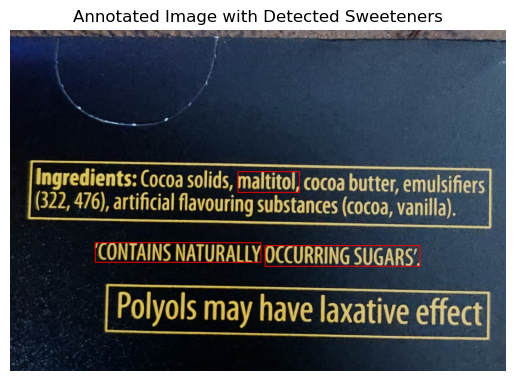

Ingredient  Confidence
1                         maltitol   90.687361
2  contain naturally occur sugar '   94.900222

In [15]:
annotate_image_with_sweeteners(path_4, model)

Well, our model is predicting the addition of sweeteners as well. This occured because the OCR happened for the entire image and I have not worked much on picking up only the ingredient list from the extracted text to keep things generic. As a consequence, all terms that hinted towards the addition of any sweeteners have been identified by the model. 

5. Moong dal - [open food facts](https://in.openfoodfacts.org/product/8904004403718/moong-dal-haldiram-s)

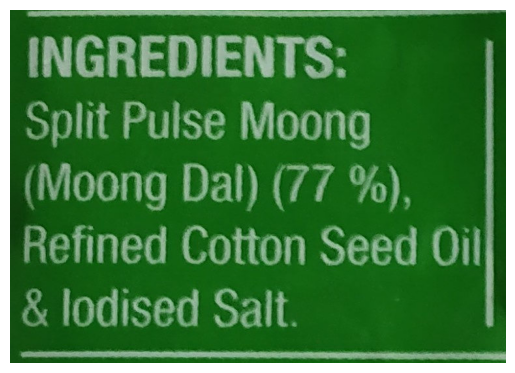

'No sweeteners detected.'

In [16]:
path_5 = data_dir + 'moong_dal.jpg'
sweet_truth_from_image(path_5, model)

6. Children's nutrition drink

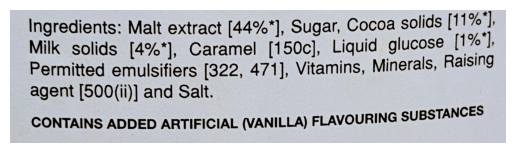

Ingredient  Confidence
1    malt extract   76.180965
2           sugar   94.900222
3  liquid glucose   95.343681

In [17]:
path_6 = data_dir + 'children_nutrition_drink.jpg'
sweet_truth_from_image(path_6, model)

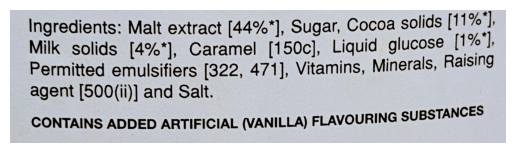

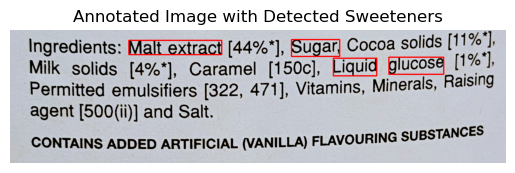

Ingredient  Confidence
1    malt extract   76.180965
2           sugar   94.900222
3  liquid glucose   95.343681

In [18]:
annotate_image_with_sweeteners(path_6, model)

7. Herb mix 

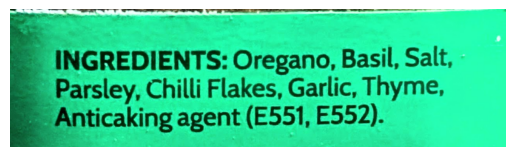

'No sweeteners detected.'

In [19]:
path_7 = data_dir + 'herb_mix.jpg'
sweet_truth_from_image(path_7, model)

The SWEET TRUTH detector is now up and running!

### Altogether, in this project, I have illustrated how machine learning techniques can be utilised to address real-world challenges when it comes to making valuable choices and avoiding any products that may contain sweeteners (whether natural or synthetic). 

This entire project showcased multiple skills: 
1. Synthetic dataset creation for the model training.
2. Natural Language Processing (**NLP**) for converting the text from ingredient lists to vectors so that our machine can identify meaningful patterns in identifying sweeteners.
    * **TF-IDF Vectorizer**
    *  **spaCy**
    *  Regular expression: **re**
4. Using advance ensemble machine learning model for identifying the list which consist sweeteners.
    * **Random Forest Classifier**
5. Preprocessing images for appropriate text extraction
    * **OpenCV**
6. Optical Character Recognition (**OCR**) for text extraction from images.
   * **pytesseract**